In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import openpyxl

In [26]:
#1
df = pd.read_excel('C:/Users/thiru/Downloads/Online Retail.xlsx', sheet_name= 'Online Retail')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [25]:
#2
df.shape

(380580, 11)

In [27]:
#3
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
#4 Filter for positive Quantity and UnitPrice, exclude December 2011
df_filtered = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) 
& ~((df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 12))]
df = df_filtered

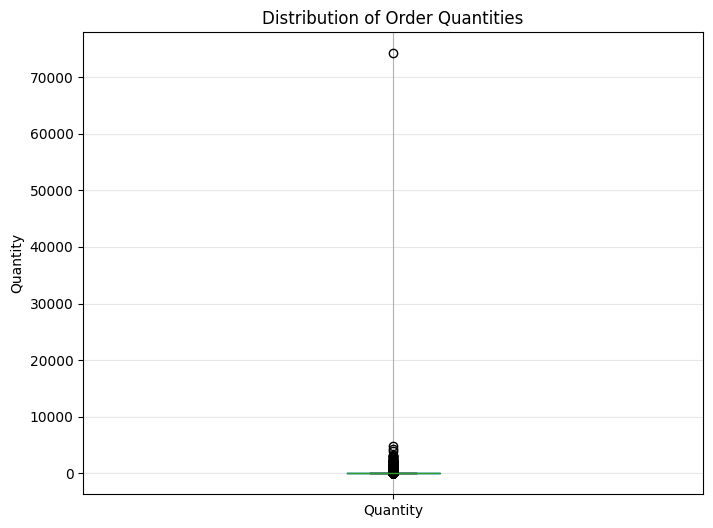

In [8]:
# 5 Create a boxplot for Quantity distribution
df.boxplot(column='Quantity', figsize=(8, 6))
plt.title('Distribution of Order Quantities')
plt.ylabel('Quantity')
plt.grid(axis='y', alpha=0.3)
plt.show()



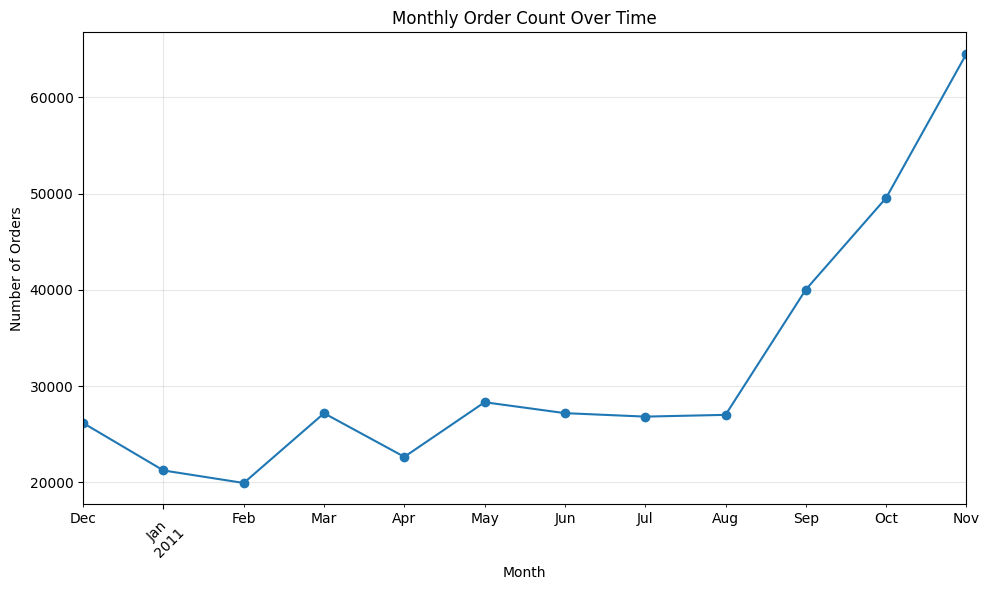

In [9]:
#6
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_orders = df.groupby('YearMonth').size()


plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Monthly Order Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#7
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [11]:
#8
invoice_customer_df = df[['InvoiceDate', 'InvoiceNo', 'Sales', 'CustomerID', 'Country']]
invoice_customer_df.head()

,InvoiceDate,InvoiceNo,Sales,CustomerID,Country
0,2010-12-01 08:26:00,536365,15.30,17850.0,United Kingdom
1,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom
2,2010-12-01 08:26:00,536365,22.00,17850.0,United Kingdom
3,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom
4,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom


In [12]:
#9
invoice_customer_df['Month'] = invoice_customer_df['InvoiceDate'].dt.to_period('M')
orders_per_customer = invoice_customer_df.groupby(
    ['Month', 'CustomerID']
)['InvoiceNo'].nunique()
repeat_customers = orders_per_customer[orders_per_customer > 1]
repeat_count = repeat_customers.groupby('Month').count()
total_customers = orders_per_customer.groupby('Month').count()
repeat_percentage = (repeat_count / total_customers) * 100
repeat_percentage


C:\Users\thiru\AppData\Local\Temp\ipykernel_16544\19132548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoice_customer_df['Month'] = invoice_customer_df['InvoiceDate'].dt.to_period('M')


Month
2010-12    29.717514
2011-01    20.107962
2011-02    19.656992
2011-03    20.636550
2011-04    19.626168
2011-05    26.420455
2011-06    22.098890
2011-07    23.919916
2011-08    20.962567
2011-09    21.406003
2011-10    23.680352
2011-11    32.451923
Freq: M, Name: InvoiceNo, dtype: float64

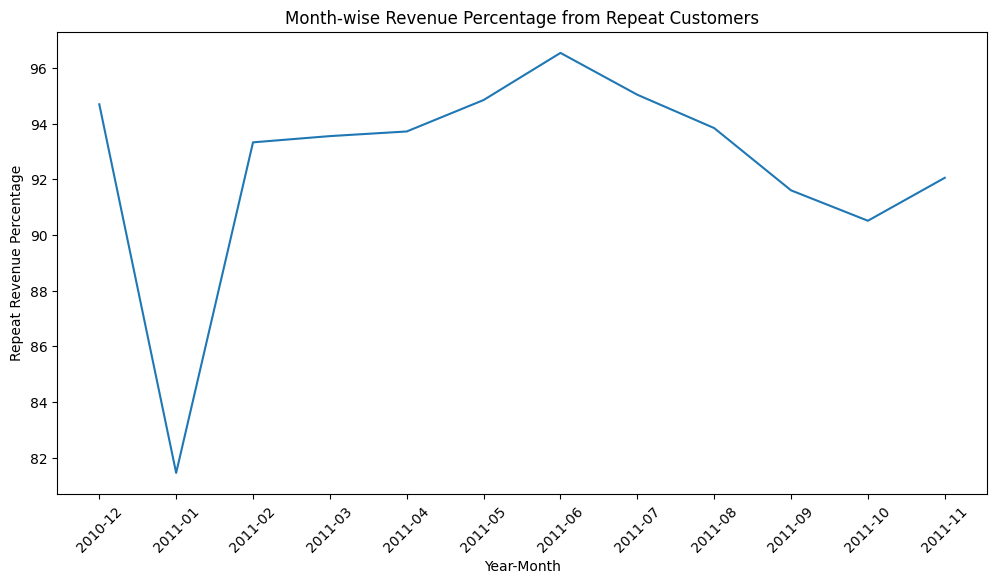

In [ ]:
#10


df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Identify repeat customers
customer_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = customer_counts[customer_counts > 1].index

monthly_total_revenue = df.groupby('YearMonth')['Revenue'].sum()

# Monthly repeat customer revenue
monthly_repeat_revenue = df[df['CustomerID'].isin(repeat_customers)].groupby('YearMonth')['Revenue'].sum()

monthly_repeat_revenue = monthly_repeat_revenue.reindex(monthly_total_revenue.index, fill_value=0)

repeat_revenue_percentage = (monthly_repeat_revenue / monthly_total_revenue) * 100

plt.figure(figsize=(12,6))
plt.plot(repeat_revenue_percentage.index.astype(str), repeat_revenue_percentage.values)
plt.xlabel("Year-Month")
plt.ylabel("Repeat Revenue Percentage")
plt.title("Month-wise Revenue Percentage from Repeat Customers")
plt.xticks(rotation=45)
plt.show()


In [14]:
# 11 Aggregate monthly quantity by StockCode
monthly_item_sales = df.groupby(['YearMonth', 'StockCode'])['Quantity'].sum().reset_index()

# Overall ranking
overall_rank = monthly_item_sales.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

# Last available month ranking
last_month = monthly_item_sales['YearMonth'].max()
last_month_sales = monthly_item_sales[monthly_item_sales['YearMonth'] == last_month]
last_month_rank = last_month_sales.sort_values(by='Quantity', ascending=False)

overall_rank.head()

last_month_rank.head()


,YearMonth,StockCode,Quantity
27069,2011-11,23084,12393
26329,2011-11,22197,8458
26240,2011-11,22086,5919
28087,2011-11,85099B,5678
27697,2011-11,84879,5190


In [15]:
#12# Select required StockCodes
selected_items = ['22086', '22197', '23084', '84826', '85099B']

# Create pivot table
pivot_df = monthly_item_sales[monthly_item_sales['StockCode'].isin(selected_items)].pivot_table(
    index='YearMonth',
    columns='StockCode',
    values='Quantity',
    fill_value=0
)
pivot_df.head()


StockCode,85099B
YearMonth,
2010-12,2056.0
2011-01,2625.0
2011-02,2971.0
2011-03,4924.0
2011-04,2211.0


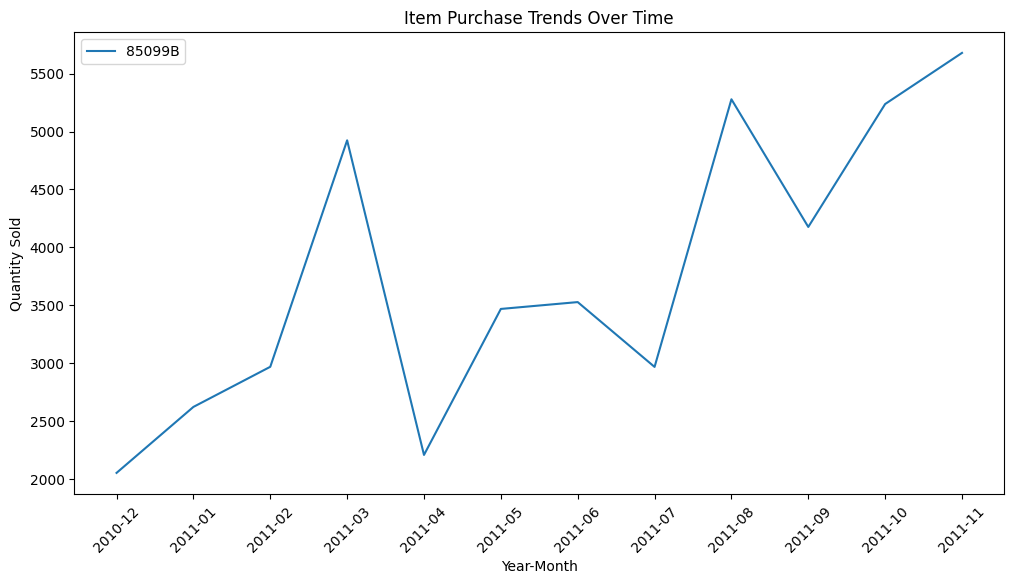

In [16]:
selected_items = ['22086', '22197', '23084', '84826', '85099B']
plt.figure(figsize=(12,6))

for item in selected_items:
    if item in pivot_df.columns:
        plt.plot(pivot_df.index.astype(str), pivot_df[item], label=item)

plt.xlabel("Year-Month")
plt.ylabel("Quantity Sold")
plt.title("Item Purchase Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [17]:
#2
df = df[df['Quantity'] > 0]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Sales,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34


In [18]:
#3
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [19]:
#4
country_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
country_revenue


Country
United Kingdom          6836007.384
Netherlands              273718.320
EIRE                     258566.980
Germany                  220882.970
France                   201747.130
Australia                138521.310
Spain                     61260.900
Switzerland               56443.950
Belgium                   39778.610
Sweden                    38140.330
Japan                     37416.370
Norway                    33379.740
Portugal                  30631.700
Finland                   21313.320
Singapore                 21279.290
Channel Islands           20252.040
Denmark                   18786.440
Italy                     17282.790
Cyprus                    13590.380
Austria                    9515.480
Poland                     7334.650
Israel                     7221.690
Iceland                    4085.180
Greece                     4079.530
Canada                     3666.380
Malta                      2725.590
USA                        2695.150
Unspecified         

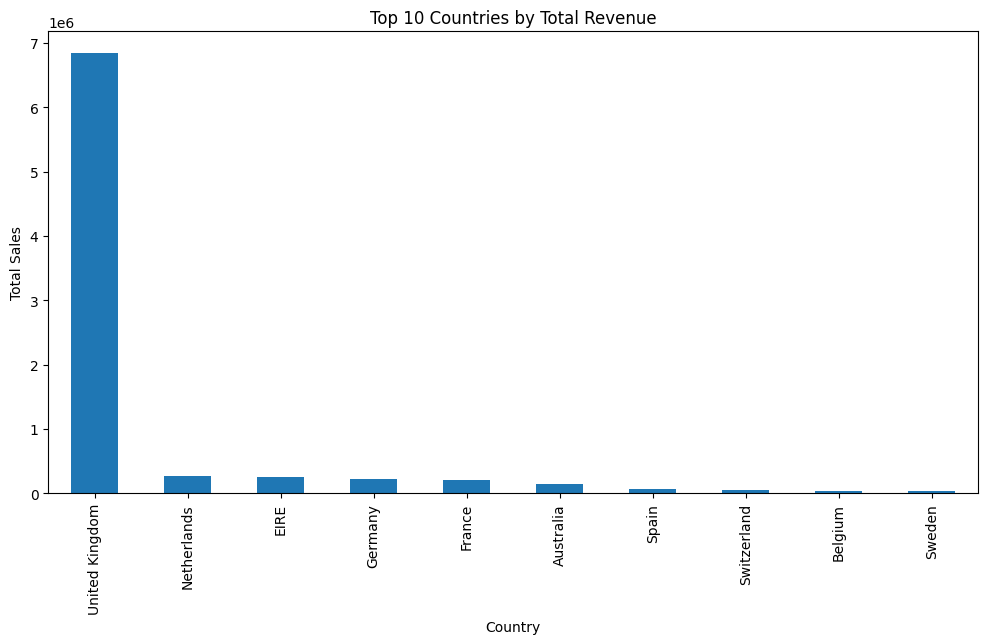

In [20]:
#5import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
country_revenue.head(10).plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Total Revenue")
plt.show()


In [21]:
#6
df_uk = df[df['Country'] == "United Kingdom"]
df_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Sales,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34


In [28]:
#7
top_products_uk = df_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_products_uk.head(10)


Description
MEDIUM CERAMIC TOP STORAGE JAR        76780
WORLD WAR 2 GLIDERS ASSTD DESIGNS     47867
JUMBO BAG RED RETROSPOT               41006
WHITE HANGING HEART T-LIGHT HOLDER    34010
ASSORTED COLOUR BIRD ORNAMENT         31453
POPCORN HOLDER                        23769
PACK OF 12 LONDON TISSUES             23720
BROCADE RING PURSE                    22492
PACK OF 72 RETROSPOT CAKE CASES       22325
VICTORIAN GLASS HANGING T-LIGHT       20966
Name: Quantity, dtype: int64

In [23]:
#8
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
customer_orders.head()


CustomerID
12748.0    200
14911.0    192
17841.0    120
13089.0     93
14606.0     91
Name: InvoiceNo, dtype: int64

Customers with many orders = loyal customers

Few orders = one-time buyers

Helps in customer segmentation & retention strategies

In [24]:
#9
sept = df[(df['InvoiceDate'].dt.year==2011) & (df['InvoiceDate'].dt.month==9)]
sept.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()


Description
JUMBO BAG RED RETROSPOT              4177
60 CAKE CASES VINTAGE CHRISTMAS      3669
POPCORN HOLDER                       3624
WORLD WAR 2 GLIDERS ASSTD DESIGNS    3462
MINI PAINT SET VINTAGE               3314
Name: Quantity, dtype: int64

#10

🔹 Country-wise Sales Analysis

Identifies high-revenue markets

Helps in international expansion and marketing strategy

🔹 Customer Order Analysis

Finds loyal vs churn customers

Helps design loyalty programs and targeted promotions

🔹 Popular Product Analysis

Identifies fast-moving products

Helps in inventory planning and demand forecasting

Reduces stockouts and overstocking